In [2]:
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

api = wandb.Api(timeout=60)

In [3]:


_untapped_potential = 'graph/untapped-potential'
_active_weights_abs = "graph/active-weights-abs"
_pparams = "meta/pparams"

runs = []
for runid in ['0kd965cx',
'fq6s9n02',
'odyjujuu']:
    runs += [api.run('mxmn/concat_mnist/' + runid)]
histories = [run.history() for run in runs]
configs = [run.config for run in runs]

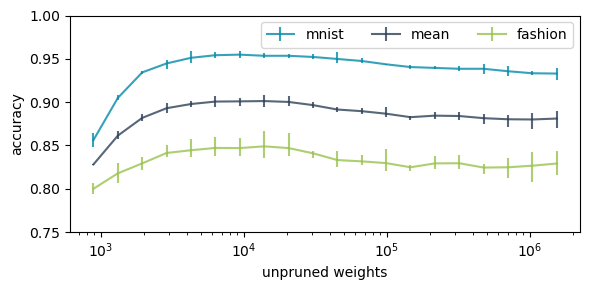

In [7]:
plt.figure(figsize=(6,3))
for attr, name, color in [
    ('tasks_performance/accuracy_mnist', 'mnist', '#048BA8'),
    ('performance/accuracy', 'mean', '#2E4057'),
    ('tasks_performance/accuracy_mnist_fashion', 'fashion', '#99C24D'),
]:
    ys = []
    for h, c in zip(histories, configs):
        ys.append(np.array(h[attr]))
        x = h[_pparams]

    df = pd.DataFrame(ys)
    y = df.mean()
    ymin = y - df.min()
    ymax = df.max() - y
    plt.errorbar(x,y,np.stack([ymin,ymax]), label=name, alpha=0.8, color=color)

    
plt.xscale('log')
plt.legend(ncol=3)
plt.ylim((0.75, 1))
plt.xlabel('unpruned weights')
plt.ylabel('accuracy')
plt.tight_layout()
plt.savefig('./taskwise-acc.png', bbox_inches='tight')

In [ ]:
n_images = 7
fig, axs = plt.subplots(1, n_images, figsize=(2*n_images, 8), gridspec_kw={'wspace': 0.05})
for i in range(n_images):
    image = x[i].reshape(56,28)
    axs[i].imshow(image, cmap='gray')
    axs[i].axis('off')  # Hide axes for clarity
plt.tight_layout()
plt.savefig('mnist-fashion-mnist.png',  bbox_inches='tight')